In [1]:
import torch

from botorch.fit import fit_gpytorch_model
from botorch.models import SingleTaskGP
from botorch.test_functions import Rastrigin
from gpytorch.mlls import ExactMarginalLogLikelihood
from botorch.acquisition import qExpectedImprovement
from botorch.optim import optimize_acqf

objective_func = Rastrigin(dim=2, negate=True)

In [2]:
torch.manual_seed(1)
train_x = torch.rand(100, 2, dtype=torch.double)
train_obj = objective_func(train_x).unsqueeze(-1)
model = SingleTaskGP(train_X=train_x, train_Y=train_obj)
mll = ExactMarginalLogLikelihood(model.likelihood, model)
fit_gpytorch_model(mll);

best_value = train_obj.max()
qEI = qExpectedImprovement(model=model, best_f=best_value)

new_point_analytic, _ = optimize_acqf(
    acq_function=qEI,
    bounds=torch.tensor([[-5.12] * 2, [5.12] * 2]),
    q=5,
    num_restarts=20,
    raw_samples=512,
    options={"batch_limit": 20, "init_batch_limit": 20},
)
# print("=" * 60)
print(new_point_analytic)

tensor([[[ 2.1882e+00,  4.6704e+00],
         [-1.2216e+00, -2.8524e+00],
         [-4.8043e+00,  2.9993e+00],
         [-1.4712e-01,  1.0795e+00],
         [ 3.2409e+00,  4.0057e+00]],

        [[ 1.6086e+00,  4.6083e+00],
         [ 4.2703e+00, -2.8195e+00],
         [-1.8699e-01,  1.1050e+00],
         [-1.0876e-01, -1.0809e-01],
         [ 1.4981e+00,  1.4335e+00]],

        [[-4.0580e+00,  2.2832e+00],
         [ 1.1884e+00, -2.3990e-01],
         [-2.8744e+00, -3.8886e+00],
         [ 9.7104e-01,  1.3537e-01],
         [-7.7807e-02, -7.8972e-02]],

        [[-2.2107e+00,  5.1200e+00],
         [-2.9311e-01,  1.1833e+00],
         [-4.6052e+00,  2.4626e+00],
         [-3.9064e+00, -1.1604e+00],
         [-9.4558e-02,  1.0440e+00]],

        [[ 4.3235e+00,  2.5091e+00],
         [-2.0174e+00, -4.7033e+00],
         [ 1.2711e+00, -3.3341e-01],
         [ 4.9098e+00, -9.7981e-01],
         [ 1.0293e+00, -4.3708e-02]],

        [[-1.3678e-01,  1.0684e+00],
         [-3.4183e-01,  1.22

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

x0 = np.random.randn(10, 2)

bounds = ((-10, 10), (-10, 10))

def f(x):
    return x[0] ** 2 + x[1]

In [ ]:
res = minimize(f, x0, method="L-BFGS-B", bounds=bounds)

In [47]:
len(bounds)

2

<StemContainer object of 3 artists>

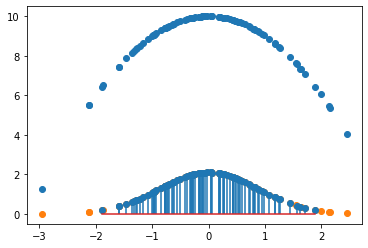

In [33]:
x = torch.randn(100)
y = -x ** 2 + 10
z = torch.exp((y - y.mean()) / y.std())
idc= torch.multinomial(z, 90)

plt.scatter(x, y)
plt.scatter(x, z)
plt.stem(x[idc].numpy(), z[idc].numpy())